# Netflix Data Analysis

## PROBLEM STATEMENT

Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.

The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.

## ABOUT THE DATASET

The dataset under consideration is a Netflix dataset containing 7,789 records and 11 columns. It includes important details about Movies and TV Shows available on the platform. Key attributes include the title, director, cast, country of origin, release date, rating, duration, and type (genres). The dataset spans multiple years, with entries ranging from 2008 to 2021, covering content across diverse countries and genres.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import o

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)


In [17]:
DATA_PATH = Path(r'C:\Users\atcha\Desktop\Netflix final proj vois\Netflix Dataset.csv')
assert DATA_PATH.exists(), f"File not found: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print('Rows, cols:', df.shape)
df.head()


Rows, cols: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [31]:
print(df.info())

df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]
print('Columns:', df.columns.tolist())
# Convert unhashable (list-like) cells to strings so .duplicated() works
# --- Duplicate check (warning-free safe version) ---
for col in df.columns:
    df[col] = df[col].map(lambda x: str(x) if isinstance(x, (list, dict, set)) else x)

dups = df.duplicated().sum()
print('Duplicate rows:', dups)

if dups:
    df = df.drop_duplicates().reset_index(drop=True)


# Parse and extract years
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['added_year'] = df['date_added'].dt.year
else:
    df['added_year'] = np.nan

if 'release_year' in df.columns:
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

if 'type' in df.columns:
    df['type'] = df['type'].str.strip().str.title()

for col in ['title', 'director', 'cast', 'country', 'rating', 'listed_in']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

df.to_csv(r'C:\Users\atcha\Desktop\Netflix final proj vois\Netflix Dataset.csv', index=False)
print('Cleaned data saved.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         7787 non-null   object 
 1   category        7787 non-null   object 
 2   title           7787 non-null   object 
 3   director        7787 non-null   object 
 4   cast            7787 non-null   object 
 5   country         7787 non-null   object 
 6   release_date    7777 non-null   object 
 7   rating          7787 non-null   object 
 8   duration        7787 non-null   object 
 9   type            7787 non-null   object 
 10  description     7787 non-null   object 
 11  added_year      0 non-null      float64
 12  country_list    7787 non-null   object 
 13  director_first  7787 non-null   object 
 14  cast_list       7787 non-null   object 
 15  duration_min    0 non-null      float64
 16  seasons         0 non-null      float64
dtypes: float64(3), object(14)
memory 

type
Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime Tv Shows, International Tv Shows, Tv Sci-Fi & Fantasy      1
Docuseries, Science & Nature Tv, Tv Action & Adventure           1
British Tv Shows, Classic & Cult Tv, Kids' Tv                    1
Docuseries, Tv Sci-Fi & Fantasy                                  1
Children & Family Movies, Dramas, Music & Musicals               1
Name: count, Length: 492, dtype: int64


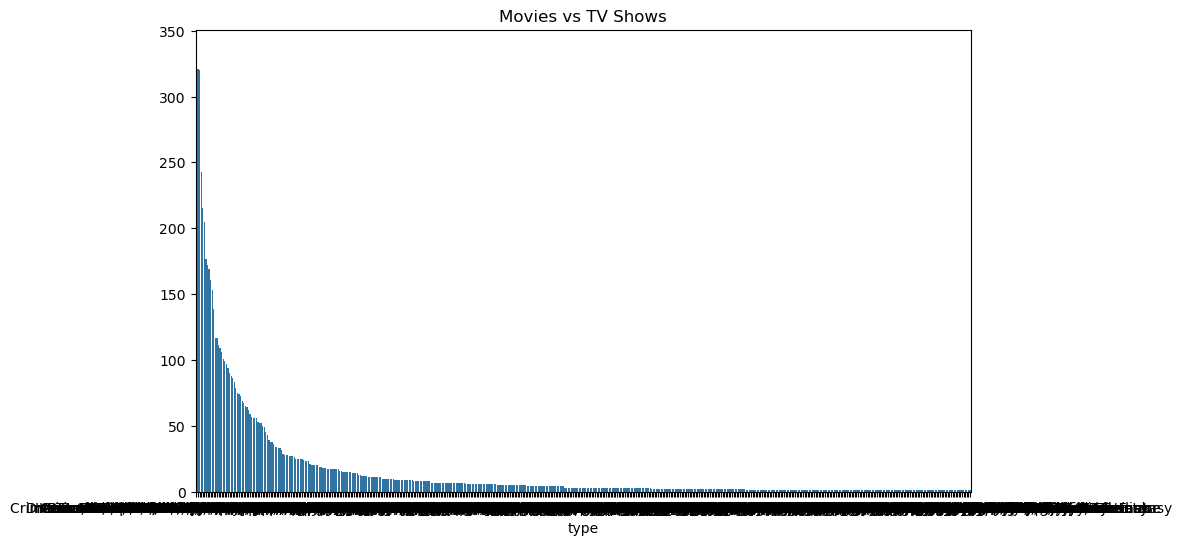

In [19]:
if 'type' in df.columns:
    type_counts = df['type'].value_counts()
    print(type_counts)

    sns.barplot(x=type_counts.index, y=type_counts.values)
    plt.title('Movies vs TV Shows')
    plt.show()


In [20]:
year_col = 'added_year' if df['added_year'].notna().any() else 'release_year'

if year_col in df.columns:
    yearly = df.groupby(year_col).size().reset_index(name='count')
    plt.plot(yearly[year_col], yearly['count'], marker='o')
    plt.title(f'Number of Titles per Year ({year_col})')
    plt.grid(True)
    plt.show()

In [21]:
genre_col = None
for c in ['listed_in', 'genres', 'type_genre']:
    if c in df.columns:
        genre_col = c
        break

if genre_col:
    df['genre_list'] = df[genre_col].fillna('Unknown').str.split(',\\s*')
    df_exploded = df.explode('genre_list')
    df_exploded['genre_list'] = df_exploded['genre_list'].str.strip().str.title()

    top_genres = df_exploded['genre_list'].value_counts().head(20)
    sns.barplot(y=top_genres.index, x=top_genres.values)
    plt.title('Top Genres')
    plt.show()

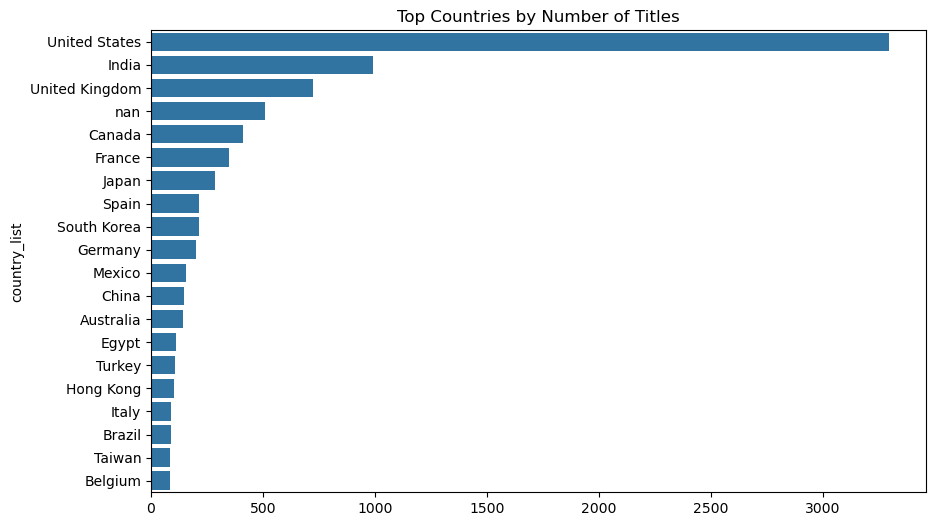

In [22]:
if 'country' in df.columns:
    df['country_list'] = df['country'].fillna('Unknown').str.split(',\\s*')
    df_countries = df.explode('country_list')
    df_countries['country_list'] = df_countries['country_list'].str.strip()

    top_countries = df_countries['country_list'].value_counts().head(20)
    sns.barplot(y=top_countries.index, x=top_countries.values)
    plt.title('Top Countries by Number of Titles')
    plt.show()


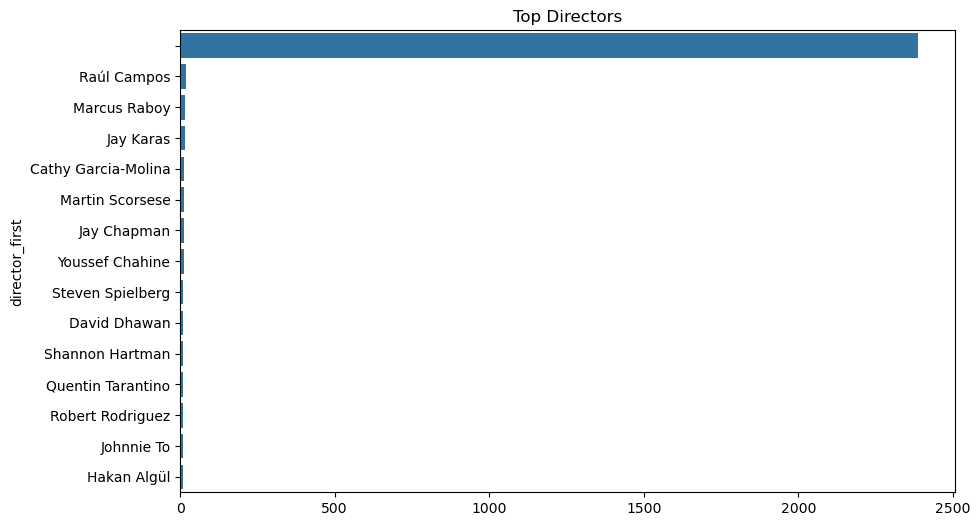

cast_list
nan                    718
Anupam Kher             42
Shah Rukh Khan          35
Naseeruddin Shah        30
Om Puri                 30
Akshay Kumar            29
Takahiro Sakurai        29
Yuki Kaji               27
Amitabh Bachchan        27
Boman Irani             27
Paresh Rawal            27
Kareena Kapoor          25
Vincent Tong            24
Andrea Libman           24
John Cleese             24
Tara Strong             22
Ashleigh Ball           22
Nawazuddin Siddiqui     21
Ajay Devgn              21
Salman Khan             20
Name: count, dtype: int64


In [23]:
if 'director' in df.columns:
    df['director_first'] = df['director'].replace('nan', np.nan).fillna('').apply(lambda x: x.split(',')[0].strip() if x else '')
    top_directors = df['director_first'].value_counts().head(15)
    sns.barplot(y=top_directors.index, x=top_directors.values)
    plt.title('Top Directors')
    plt.show()

if 'cast' in df.columns:
    df['cast_list'] = df['cast'].fillna('').str.split(',\\s*')
    cast_exploded = df.explode('cast_list')
    top_cast = cast_exploded['cast_list'].value_counts().head(20)
    print(top_cast)

In [24]:
if 'rating' in df.columns:
    print(df['rating'].value_counts().head(30))

if 'duration' in df.columns:
    dur = df['duration'].astype(str)
    df['duration_min'] = pd.to_numeric(dur.str.extract(r'(\\d+)\\s*min', expand=False), errors='coerce')
    df['seasons'] = pd.to_numeric(dur.str.extract(r'(\\d+)\\s*Season', expand=False), errors='coerce')
    print(df[['duration', 'duration_min', 'seasons']].head())

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
nan            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
    duration  duration_min  seasons
0  4 Seasons           NaN      NaN
1     93 min           NaN      NaN
2     78 min           NaN      NaN
3     80 min           NaN      NaN
4    123 min           NaN      NaN


In [27]:
if 'type' in df.columns and genre_col:
    cross = df_exploded.groupby(['genre_list', 'type']).size().unstack(fill_value=0)
    if 'Movie' in cross.columns and 'Tv Show' in cross.columns:
        cross['movie_share'] = cross['Movie'] / (cross['Movie'] + cross['Tv Show'])
        print(cross.sort_values('movie_share', ascending=False).head(15))

In [28]:
if 'df_exploded' in globals():
    df_exploded.to_csv('/mnt/data/netflix_exploded.csv', index=False)
print('Notebook complete! All cleaned data saved.')

Notebook complete! All cleaned data saved.
